# (?) The Average Eccentricity Curve of a Sample of Points on an Absolute Geometry is Invariant of its Curvature.

## The Theory

### Intuition

In a way, we can think of non-Euclidean spaces as continuous version of graphs. 
- In the Poincare Disc Model of the Hyperbolic Geometry, the "density" of space increases exponentially as we go farther from the origin. Likewise, the number of nodes on each level of $b$-ary trees increases exponentially as we go farther from the root. Thus, in a way, we can think of the Hyperbolic spaces as continuous versions of trees.
- In the Projective Disc Model of the Spherical Geometry, geodesic lines are allowed to "loop back" from one side of the disc to the other side. Now, certain graphs cannot be embedded in the plane (i.e., some edges crosses other edges to connect possibly far away nodes). Thus, in a way, we can think of spherical spaces as continuous versions of graphs with loops.

These are very rough intuitions. But they do lead one to sense the connection between graphs and non-Euclidean spaces. Now, how can we rigorously relate these stuff?

### Definition: The Average Eccentricity Curve

Let's take a uniform random sample $X$ from a geometry with curvature $K$. Given a positive real $d$, we can construct a graph $G(X, d)$ from $X$ as follows:
- Let the nodes of $G$ be the points in $X$
- Connect two nodes in $G$ if their corresponding points in $X$ are at most $d$ distance apart.

Notice that there must be an large enough $d$ such that $G$ is connected. And as we increase $d$, farther away nodes get connected and thus the average eccentricity decreases. Eventually, once every node is connected to every other node, the average eccentricity drops down to $1$. We then 

## Data Generation

### Import necessary libraries

In [88]:
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

import geomstats.backend as gs
from geomstats.geometry.poincare_ball import PoincareBall
from geomstats.geometry.hyperbolic import Hyperbolic
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.euclidean import Euclidean

### Prepare utility functions

In [44]:
def sample_points(manifold, n):
    # takes uniform sample from a manifold
    points = manifold.random_uniform(n)
    return points

In [45]:
def get_ave_ecc_curve(manifold, points):
    # calculates the average eccentricity curve of the points
    n = len(points)
    points_dist = manifold.metric.dist_pairwise(points)
    
    dist_edges = {}
    for i in range(n):
        for j in range(n):
            d = points_dist[i][j]
            if d == 0: continue
            if d in dist_edges:
                dist_edges[d].append((i, j))
            else:
                dist_edges[d] = [(i, j)]
    
    graphs = []
    g = nx.Graph()
    g.add_nodes_from(range(n))
    
    for d in sorted(dist_edges):
        g = g.copy()
        for e in dist_edges[d]:
            g.add_edge(*e)
        graphs.append(g.copy())
    
    ave_eccs = []
    bounding_indices = []
    for i in range(len(graphs)):
        if nx.is_connected(graphs[i]):
            eccs = sorted([nx.eccentricity(graphs[i], j) for j in range(n)], reverse=True)
            ave_ecc = sum(eccs) / n
            ave_eccs.append(ave_ecc)
            
            bi = np.where(np.array(eccs) >= ave_ecc)[0][-1]
            bounding_indices.append(bi)
        else:
            #print(i, "not connected")
            pass
    return ave_eccs, bounding_indices

In [46]:
def gen_ave_eccs(m, n, k):
    if k < 0:
        scale = 1/np.sqrt(-k)
        manifold = PoincareBall(dim=2, scale=scale)
        #manifold = Hyperbolic(dim=2)
    elif k == 0:
        manifold = Euclidean(dim=2)
    else:
        manifold = Hypersphere(dim=2)
    
    ave_eccs_list = []
    #bounding_indices_list = []
    for i in range(m):
        points = sample_points(manifold, n=n)
        #ave_eccs, bounding_indices = get_ave_ecc_curve(pb_manifold, points)
        ave_eccs, _ = get_ave_ecc_curve(manifold, points)
        ave_eccs_list.append(ave_eccs)
        #bounding_indices_list.append(bounding_indices)
    return ave_eccs_list

### Take samples from hyperbolic, euclidean, and hypersphere geometries

In [65]:
%%time
ave_eccs_hyperbolic = gen_ave_eccs(m=100, n=11, k=-1)

CPU times: user 3.23 s, sys: 9.46 ms, total: 3.24 s
Wall time: 3.2 s


In [66]:
%%time
ave_eccs_euclidean = gen_ave_eccs(m=100, n=11, k=0)

CPU times: user 2.96 s, sys: 0 ns, total: 2.96 s
Wall time: 2.93 s


In [67]:
%%time
ave_eccs_hypersphere = gen_ave_eccs(100, 11, 1)

CPU times: user 4.26 s, sys: 28.9 ms, total: 4.29 s
Wall time: 4.26 s


## Plots

### Plot Average Eccentricity Curve

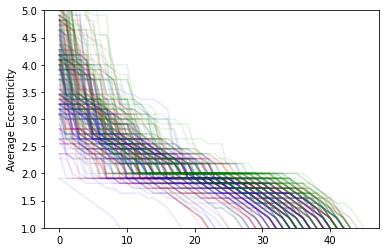

In [69]:
for ecc in ave_eccs_hyperbolic:
    plt.plot(ecc, color='red', alpha=0.1)
for ecc in ave_eccs_euclidean:
    plt.plot(ecc, color='blue', alpha=0.1)
for ecc in ave_eccs_hypersphere:
    plt.plot(ecc, color='green', alpha=0.1)
plt.title("")
plt.ylim(1, 5)
plt.ylabel("Average Eccentricity")
plt.show()

### Plot Minimum Spanning Tree Eccentrity Distribution

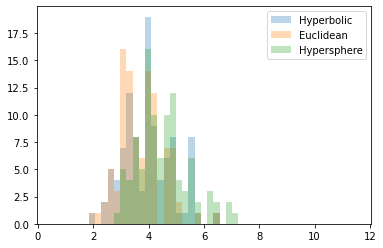

In [82]:
plt.hist([l[0] for l in ave_eccs_hyperbolic], bins=np.linspace(0, 11)+0.5, alpha=0.3, label="Hyperbolic")
plt.hist([l[0] for l in ave_eccs_euclidean], bins=np.linspace(0, 11)+0.5, alpha=0.3, label="Euclidean")
plt.hist([l[0] for l in ave_eccs_hypersphere], bins=np.linspace(0, 11)+0.5, alpha=0.3, label="Hypersphere")
plt.legend()
plt.show()

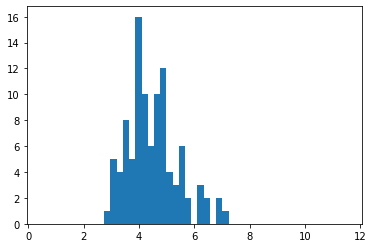

In [83]:
plt.hist([l[0] for l in ave_eccs_hypersphere], bins=np.linspace(0, 11)+0.5);

### Plot time to end

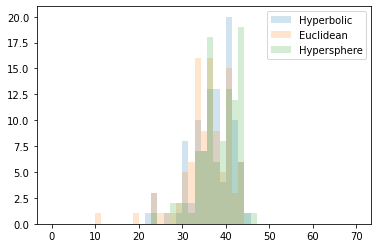

In [86]:
plt.hist([len(l) for l in ave_eccs_hyperbolic], bins=np.linspace(0, 70), alpha=0.2, label="Hyperbolic")
plt.hist([len(l) for l in ave_eccs_euclidean], bins=np.linspace(0, 70), alpha=0.2, label="Euclidean")
plt.hist([len(l) for l in ave_eccs_hypersphere], bins=np.linspace(0, 70), alpha=0.2, label="Hypersphere")
plt.legend()
plt.show()

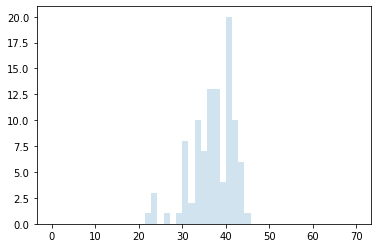

In [87]:
plt.hist([len(l) for l in ave_eccs_hyperbolic], bins=np.linspace(0, 70), alpha=0.2);